# 1.Import relevant libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# 2.Data Inspection and Data Cleaning

In [2]:
#Load Dataset
HPP=pd.read_csv("house.csv")

In [3]:
HPP

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.99340,2,4019
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.99440,2,4019
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.99410,2,4019
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.99930,2,4019
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.99540,2,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6825,2,0,650000,0,152,14.5,3087,1,1,210,79.0,2006,-1,145.07878,2,2329
6826,4,0,635000,1,260,14.7,3030,2,1,662,172.0,1980,-1,144.64789,6,16166
6827,3,0,1031000,3,251,6.8,3016,2,2,333,133.0,1995,-1,144.87904,6,6380
6828,4,0,2500000,0,222,6.8,3016,1,5,866,157.0,1920,-1,144.89299,6,6380


In [4]:
HPP.shape

(6830, 16)

In [5]:
#We have 6830 rows and 16 columns in this dataset.

In [6]:
HPP.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
#ratio of null values
HPP.isnull().sum()/HPP.shape[0] *100

Rooms            0.0
Type             0.0
Price            0.0
Method           0.0
SellerG          0.0
Distance         0.0
Postcode         0.0
Bathroom         0.0
Car              0.0
Landsize         0.0
BuildingArea     0.0
YearBuilt        0.0
CouncilArea      0.0
Longtitude       0.0
Regionname       0.0
Propertycount    0.0
dtype: float64

In [8]:
#We have 0% of missing values in this dataset.

In [9]:
HPP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
Rooms            6830 non-null int64
Type             6830 non-null int64
Price            6830 non-null int64
Method           6830 non-null int64
SellerG          6830 non-null int64
Distance         6830 non-null float64
Postcode         6830 non-null int64
Bathroom         6830 non-null int64
Car              6830 non-null int64
Landsize         6830 non-null int64
BuildingArea     6830 non-null float64
YearBuilt        6830 non-null int64
CouncilArea      6830 non-null int64
Longtitude       6830 non-null float64
Regionname       6830 non-null int64
Propertycount    6830 non-null int64
dtypes: float64(3), int64(13)
memory usage: 853.9 KB


In [10]:
#categorical features
categorical = HPP.select_dtypes(include =[np.object])
print("Categorical Features in HPP Set:",categorical.shape[1])

#numerical features
numerical= HPP.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in HPP Set:",numerical.shape[1])

Categorical Features in HPP Set: 0
Numerical Features in HPP Set: 16


In [11]:
#The dataset is already converted to numerical values so no need for label encoding

In [12]:
HPP.describe()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,6830.000000,6830.000000,6.830000e+03,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000
mean,2.978184,0.541435,1.077604e+06,1.438360,131.632211,10.148960,3104.262225,1.594143,1.606881,487.495461,143.446606,1964.444070,13.603075,144.991877,3.792679,7433.780527
std,0.970479,0.834160,6.733202e+05,1.142603,77.124693,5.991423,91.208614,0.714366,0.944613,910.805627,89.970692,37.706332,10.370476,0.104983,2.011551,4352.096045
min,1.000000,0.000000,1.310000e+05,0.000000,0.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.542370,0.000000,389.000000
25%,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,167.000000,93.000000,1940.000000,2.000000,144.925522,2.000000,4381.250000
50%,3.000000,0.000000,8.900000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,404.000000,126.000000,1970.000000,15.000000,144.997000,5.000000,6567.000000
75%,4.000000,1.000000,1.334000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,641.000000,173.000000,2000.000000,23.000000,145.056100,5.000000,10175.000000
max,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.400000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.526350,7.000000,21650.000000


In [13]:
#TO CHECK SKEWNESS
from scipy.stats import skew

Rooms
0.3021759679610752


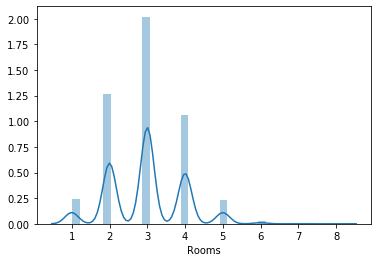

Type
1.0252678351565507


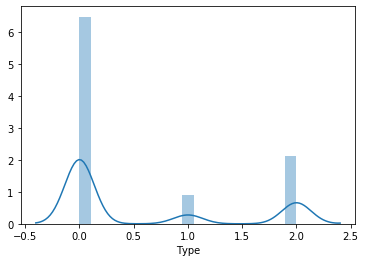

Price
2.4501246081311843


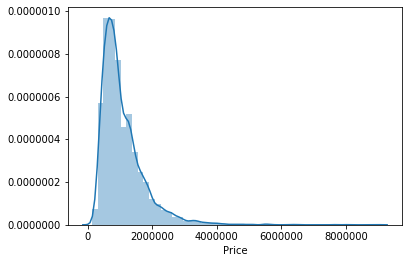

Method
1.08499908428232


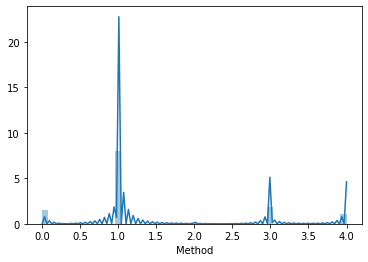

SellerG
0.12468101239767151


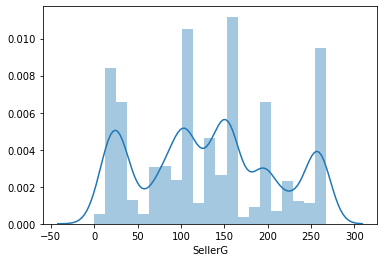

Distance
1.7226448157560525


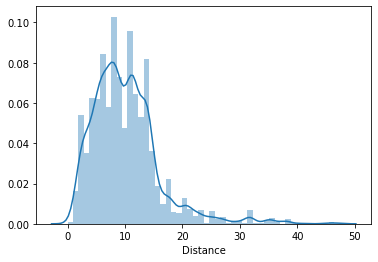

Postcode
3.9628782603433206


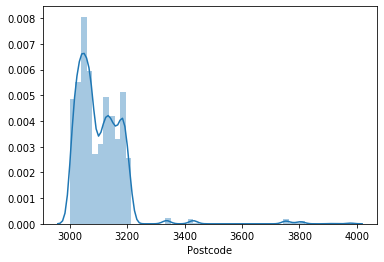

Bathroom
1.3215416130514483


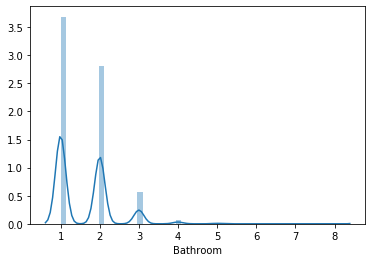

Car
1.4525653341039435


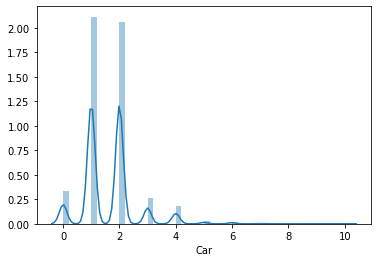

Landsize
18.32220190805668


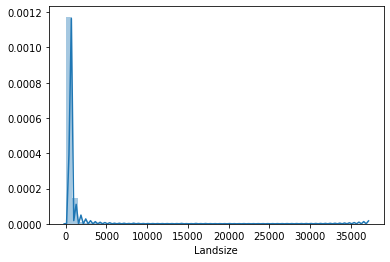

BuildingArea
7.610537587389018


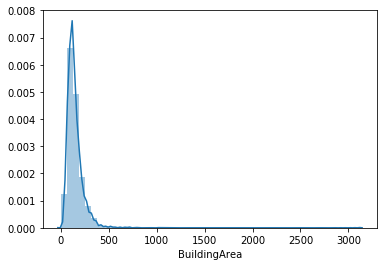

YearBuilt
-1.6745209931454095


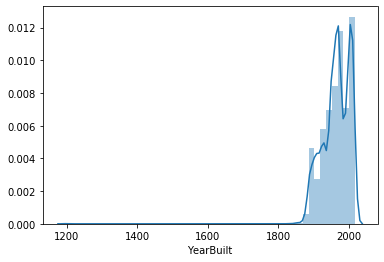

CouncilArea
0.029431307143680245


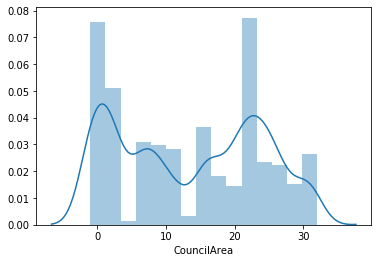

Longtitude
-0.21601940529827443


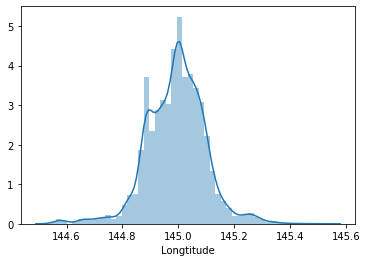

Regionname
-0.5095866786401961


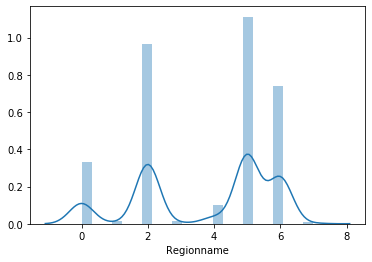

Propertycount
1.0558828196332266


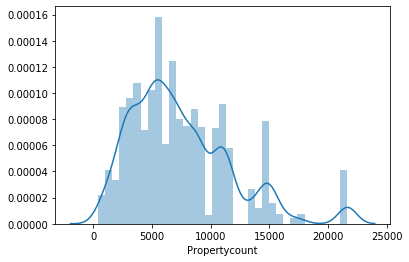

In [14]:
for col in HPP:
    print(col)
    print(skew(HPP[col]))
    plt.figure()
    sns.distplot(HPP[col])
    plt.show()

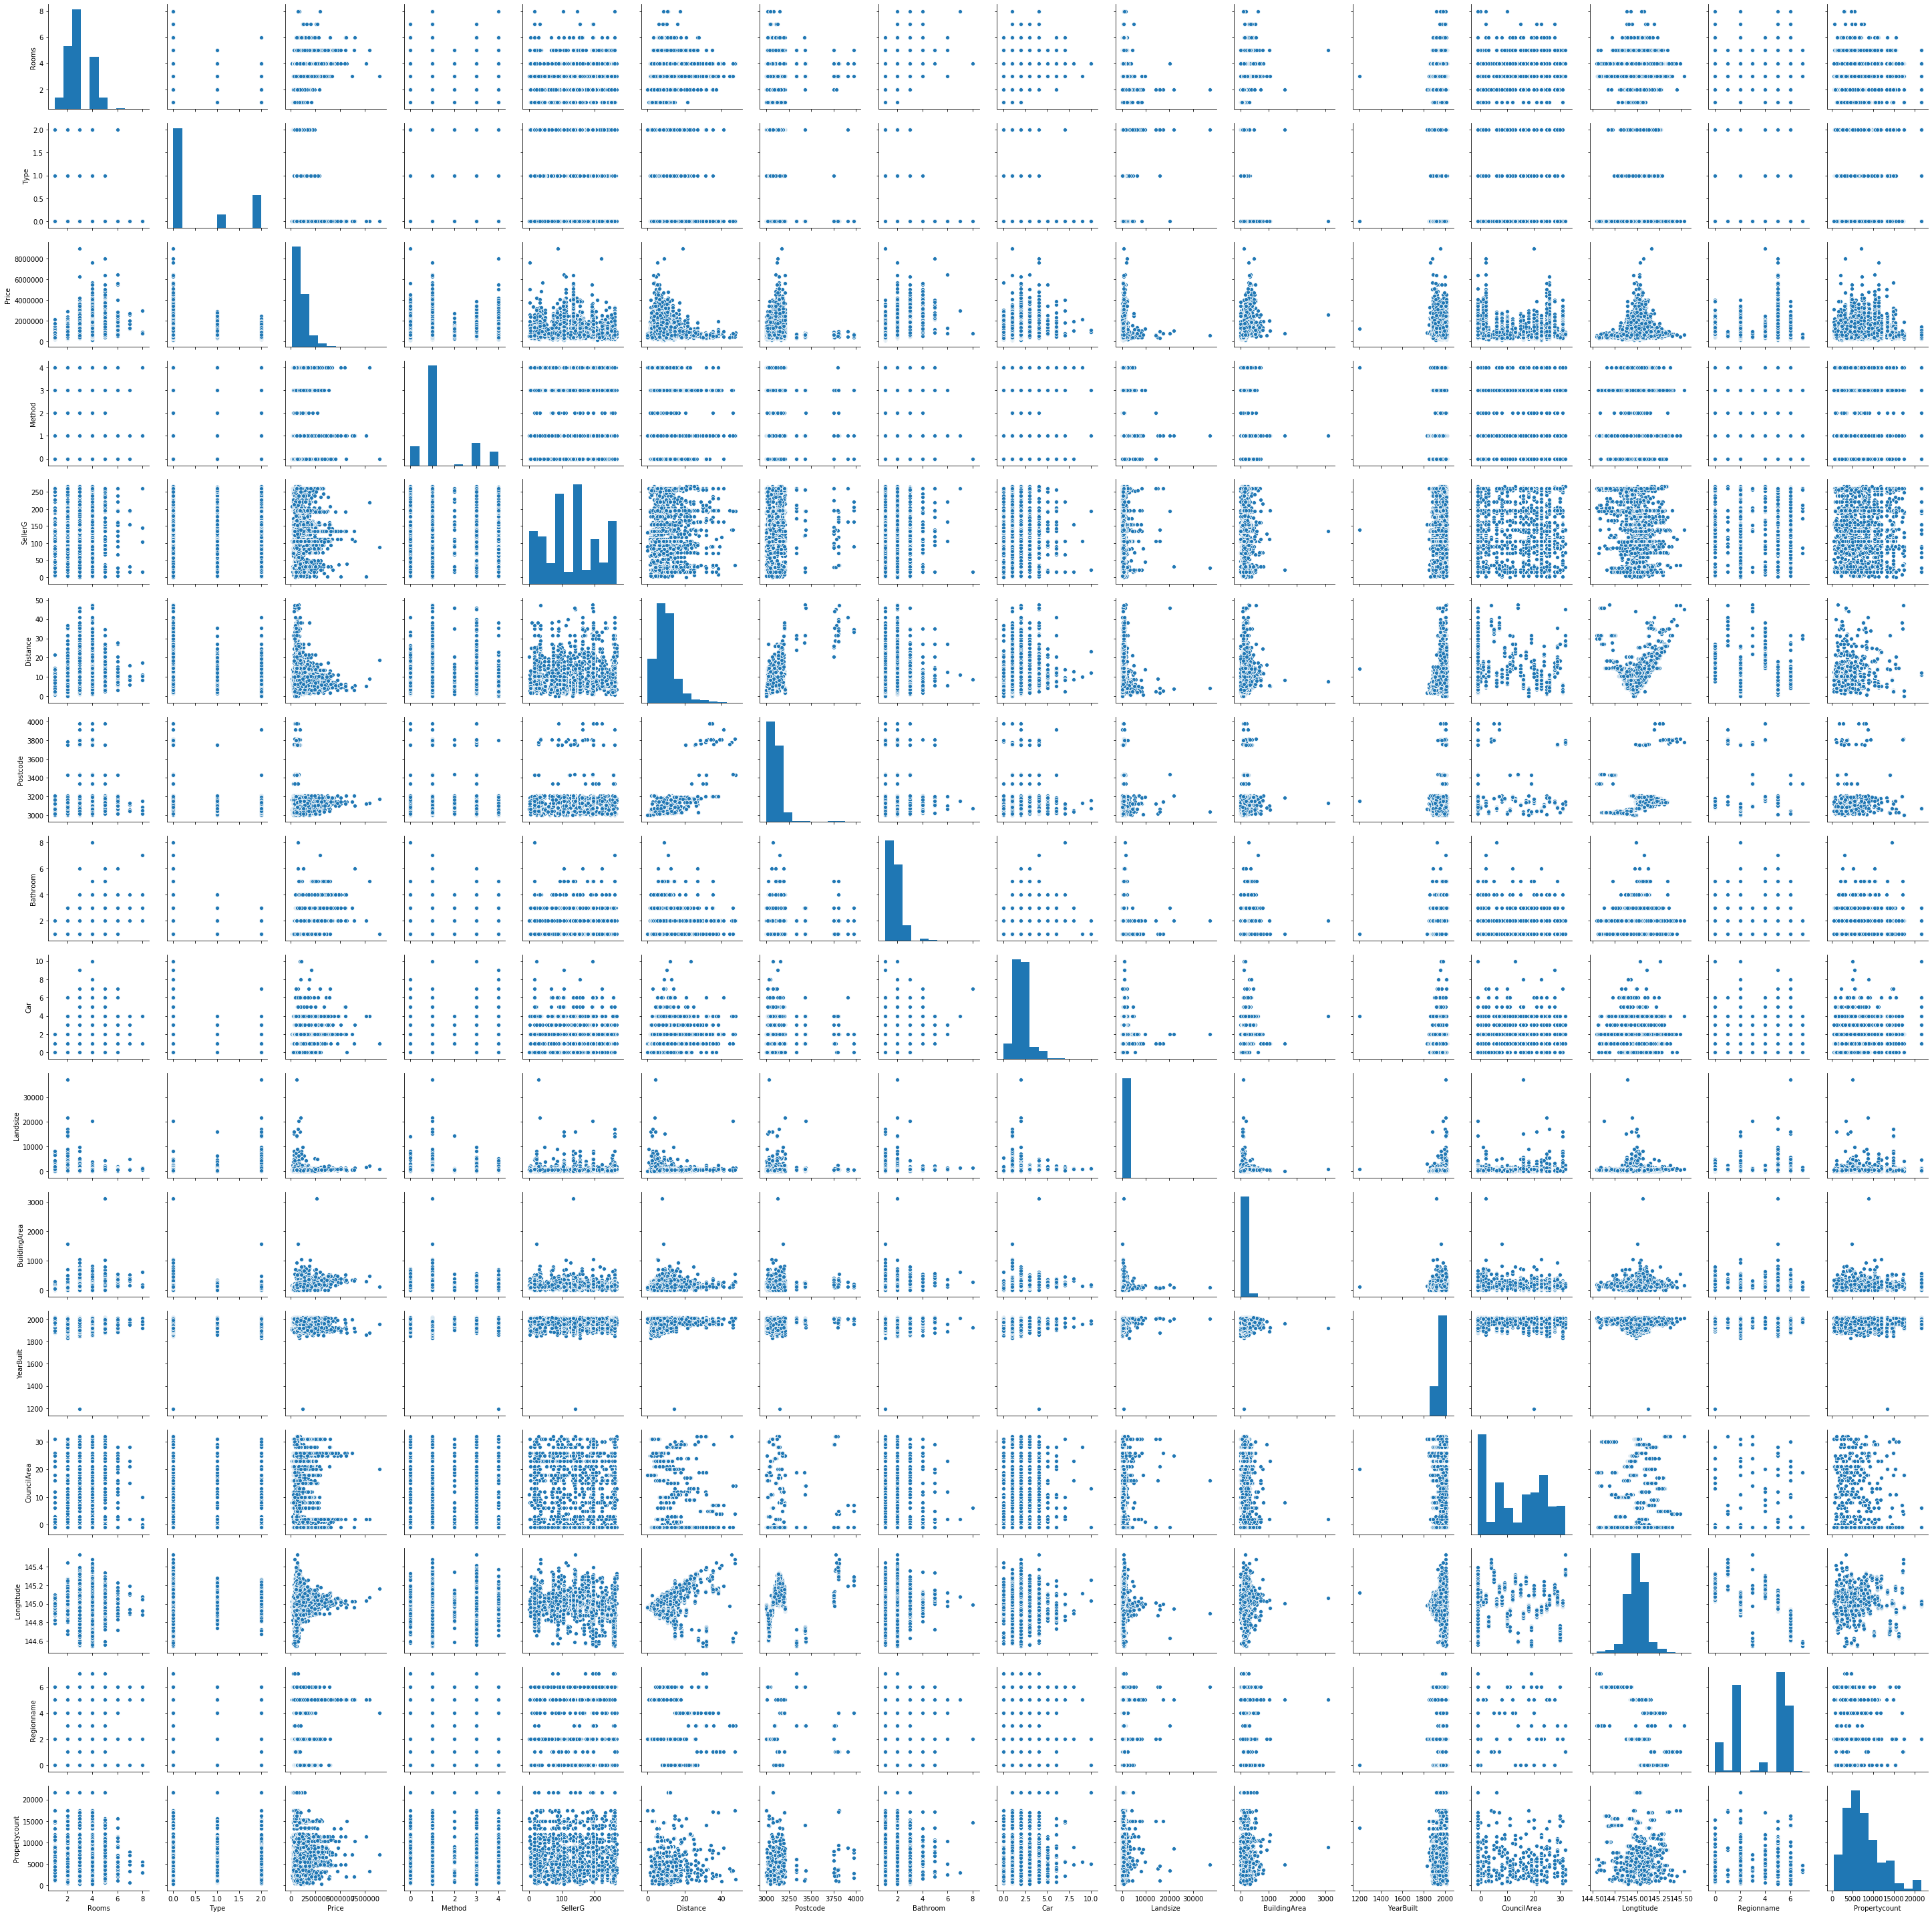

In [15]:
sns.pairplot(HPP)
plt.show()

In [16]:
#check correlation
HPP.corr()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.579983,0.517718,-0.048423,-0.017318,0.289763,0.068674,0.613285,0.420493,0.099031,0.603150,-0.049272,-0.205097,0.096665,-0.005093,-0.100447
Type,-0.579983,1.000000,-0.419183,0.088179,0.021241,-0.240904,0.008063,-0.273788,-0.281780,-0.045246,-0.388990,0.320428,0.152362,0.002320,0.053642,0.098420
Price,0.517718,-0.419183,1.000000,-0.041462,-0.058529,-0.164975,0.109343,0.492481,0.250916,0.073536,0.520492,-0.307343,-0.125901,0.209786,0.090802,-0.053336
Method,-0.048423,0.088179,-0.041462,1.000000,-0.008489,-0.058832,-0.031344,-0.006614,-0.014382,-0.015780,-0.040639,0.024371,0.022126,-0.048818,0.025594,-0.020742
SellerG,-0.017318,0.021241,-0.058529,-0.008489,1.000000,0.026803,-0.002534,-0.029692,0.006835,-0.009812,-0.032581,0.010859,-0.000537,-0.057695,0.013905,0.061711
Distance,0.289763,-0.240904,-0.164975,-0.058832,0.026803,1.000000,0.438274,0.124044,0.265142,0.082449,0.155148,0.258462,-0.277766,0.215594,-0.094625,-0.061433
Postcode,0.068674,0.008063,0.109343,-0.031344,-0.002534,0.438274,1.000000,0.112776,0.049226,0.039998,0.081791,0.036819,-0.070475,0.430579,-0.013522,0.058542
Bathroom,0.613285,-0.273788,0.492481,-0.006614,-0.029692,0.124044,0.112776,1.000000,0.335331,0.081680,0.539717,0.166412,-0.114353,0.119573,0.036411,-0.062127
Car,0.420493,-0.281780,0.250916,-0.014382,0.006835,0.265142,0.049226,0.335331,1.000000,0.113427,0.331702,0.114340,-0.175219,0.061410,0.005498,-0.033258
Landsize,0.099031,-0.045246,0.073536,-0.015780,-0.009812,0.082449,0.039998,0.081680,0.113427,1.000000,0.082815,0.031474,-0.049916,0.026882,-0.009509,-0.014909


[]

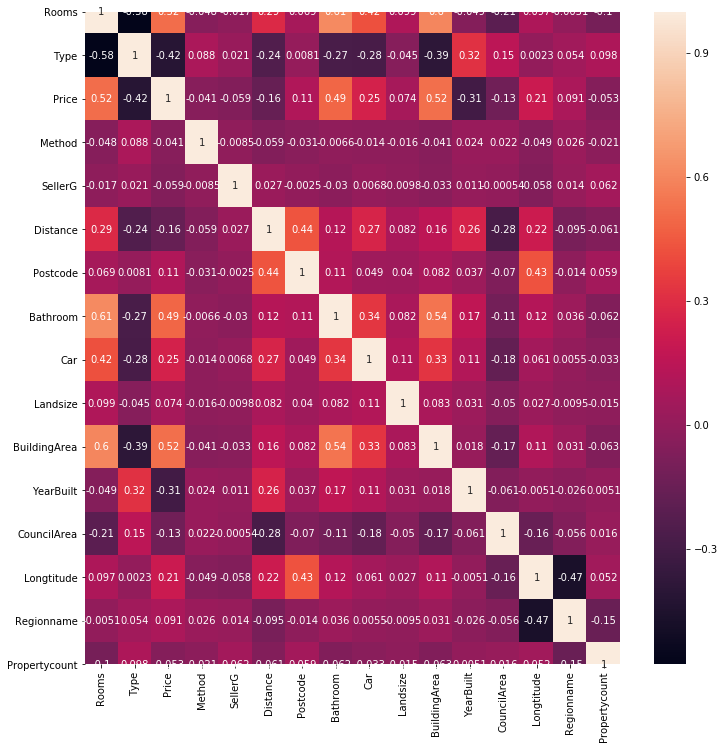

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(HPP.corr(),annot=True)
plt.plot()

# 3.Performing The Model

# Linear Regression

In [18]:
#select x (input) and select y(target/output)
x=HPP.drop("Price",axis=1) #independent variable
y=HPP["Price"] #dependent variable which is predict

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
#call the class 
from sklearn.linear_model import LinearRegression 

In [22]:
#create object of LinearRegression class
lr=LinearRegression()

In [23]:
#train the model:use fit() method
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
#to check the slope means coefficient:use inbuilt method coef_
lr.coef_

array([ 1.18003726e+05, -1.68990114e+05, -7.26096664e+02, -1.24949413e+01,
       -4.63229765e+04,  1.06835688e+03,  2.02809523e+05,  5.19366172e+04,
        1.84105442e+01,  1.47156228e+03, -2.83199382e+03, -3.71622245e+03,
        1.47397536e+06,  4.83943558e+04, -1.28615933e+00])

In [25]:
#to check the intercept then use inbuilt method intercept_
lr.intercept_

-210932631.52815437

In [26]:
#testing

In [27]:
#use inbuilt method predict() of Linear Regresiion for testing
y_pred=lr.predict(x_test) #predicted output =predict(input)

In [28]:
y_pred

array([1406483.80710191, 1710787.13813058, 1370848.70899612, ...,
       1399299.80474627, 2031579.66488785,  663675.79474908])

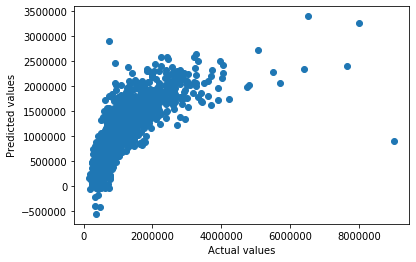

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
#mean_squared_error
mse=mean_squared_error(y_test,y_pred)#RSS/no.of datapoint

In [32]:
#root mean squared error(RMSE)
rmse=np.sqrt(mse)

In [33]:
r2=r2_score(y_test,y_pred)

In [34]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("R2 Score:",r2)

Mean_squared_error: 219767268003.8064
Root_mean_squared_error: 468793.4171933373
R2 Score: 0.5775984742888285


# ASSUMPTIONS OF LINEAR REGRESSION

In [35]:
'''1.There should be Linear relationship between independent variable and dependent variable'''

'1.There should be Linear relationship between independent variable and dependent variable'

In [36]:
#find the residual 
residual=y_test-y_pred

In [37]:
#original 
y_test

5366    1785000
4999    1060000
6073    1740000
1139    1125000
4401     680000
         ...   
6599     750000
6097     560000
996     1030000
6727    1535000
5092     715000
Name: Price, Length: 2049, dtype: int64

In [38]:
residual

5366    378516.192898
4999   -650787.138131
6073    369151.291004
1139    -81047.518893
4401   -547966.683525
            ...      
6599   -183092.944794
6097     49030.693420
996    -369299.804746
6727   -496579.664888
5092     51324.205251
Name: Price, Length: 2049, dtype: float64

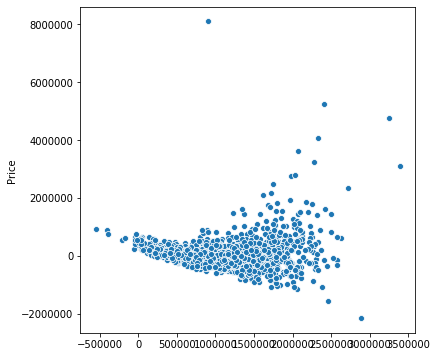

In [39]:
#scatterplot between y_pred and residual,to check linear relationship or not
plt.figure(figsize=(6,6))#scatterplot between y_pred and residual,to check linear relationship or not
sns.scatterplot(y_pred,residual)
plt.show()


In [40]:
#There is Linear Relationship 

In [41]:
'''2.Assumption of linear regression:
   if found linear relation then also check homoskedastik or not'''

'2.Assumption of linear regression:\n   if found linear relation then also check homoskedastik or not'

In [42]:
'''3.No multicolinearity'''

'3.No multicolinearity'

In [43]:
'''4.if we plot residual error(of each data point)then we should get a bell shapped curve means 
Normal Distribution(skewness=0,symmetric curve) means data are normally distributed on both side'''

'4.if we plot residual error(of each data point)then we should get a bell shapped curve means \nNormal Distribution(skewness=0,symmetric curve) means data are normally distributed on both side'

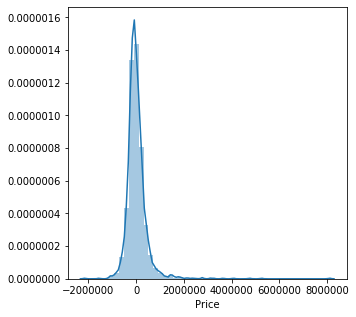

In [44]:
#distplot:Normal Distributed curve :it is also called frequency plot
plt.figure(figsize=(5,5))
sns.distplot(residual)
plt.show()

# Polynomial Regression

In [45]:
#select x (input) and select y(target/output)
x=HPP.drop("Price",axis=1) #independent variable
y=HPP["Price"] #dependent variable which is predict

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
#create a object of PolynomialFeatures
pf=PolynomialFeatures(2) #pass how much degree

In [48]:
#we create polynomial version of x so we call pf.fit_transform()
x_poly=pf.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#train and test
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.3)

In [51]:
lr1=LinearRegression()

In [52]:
lr1.fit(x_train,y_train)

LinearRegression()

In [53]:
#we can perform the prediction then call predict()
y_pred=lr1.predict(x_test)


In [54]:
y_pred

array([1552247.59320068, 1564445.2024231 , 1451758.91422272, ...,
       1339098.00258636, 2316231.21774292,  456664.20199585])

In [55]:
#check mean squared error and r2 square
mean_squared_error(y_test,y_pred)

164424340072.62823

In [56]:
#r2_score 
r2_score(y_test,y_pred)

0.6839698070527602

In [57]:
#calculate the residual
residuals=y_test-y_pred

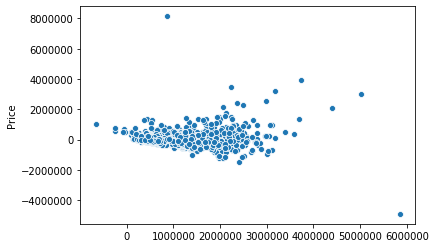

In [58]:
#after calculations the residuals,plot the residuals and predicted value
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

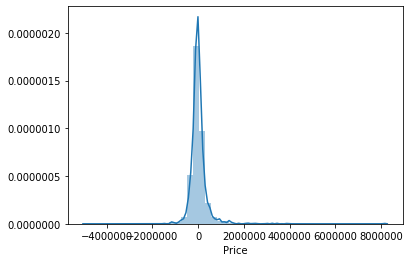

In [59]:
plt.figure()
sns.distplot(residuals)
plt.show()

In [60]:
#Normal Distribution --> we got bell shaped curve 

# REGULARISATION

In [61]:
#LASSO REGULARISATION

In [62]:
from sklearn.linear_model import Lasso  

In [63]:
#create object of Lasso class and passing value of lambda
l1=Lasso(1000)

In [64]:
#Train the model with lasso regularisation:use fit()
l1.fit(x_train,y_train)

Lasso(alpha=1000)

In [65]:
lr.coef_

array([ 1.18003726e+05, -1.68990114e+05, -7.26096664e+02, -1.24949413e+01,
       -4.63229765e+04,  1.06835688e+03,  2.02809523e+05,  5.19366172e+04,
        1.84105442e+01,  1.47156228e+03, -2.83199382e+03, -3.71622245e+03,
        1.47397536e+06,  4.83943558e+04, -1.28615933e+00])

In [66]:
x.columns

Index(['Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [67]:
l1.coef_ 

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -8.74550451e+01,  0.00000000e+00,  2.40482231e+03,  0.00000000e+00,
        0.00000000e+00,  1.35253052e+02,  3.04260064e+03, -4.91348455e+03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.60495731e+01,
       -2.67747520e+04, -3.59196921e+04, -6.38898252e+03, -8.29465110e+01,
       -4.21200734e+03,  2.75217415e+02,  3.08490101e+04, -1.57763806e+04,
       -4.06204958e+01, -3.23653058e+02, -3.02414145e+02, -3.68579180e+03,
        1.07199608e+03, -2.50504564e+02,  2.77622770e-01,  0.00000000e+00,
       -3.67457899e+03, -1.26795798e+02,  1.46793560e+04, -2.86821800e+02,
        0.00000000e+00, -0.00000000e+00, -9.27339505e+01,  2.70346428e+02,
        5.49743594e+02,  1.23877381e+03, -2.51761386e+03, -5.55829789e+03,
        6.81439319e-01, -2.16530489e+04, -1.09315487e+02, -8.13711369e+02,
       -1.06898837e+01, -0.00000000e+00,  9.54594674e+03, -1.26496233e+01,
        3.39637116e+01,  

In [68]:
#RIDGE REGULARISATION

In [69]:
from sklearn.linear_model import Ridge 

In [70]:
#create object of Ridge class and passing value of lambda
l2=Ridge(10)

In [71]:
#Train the model with Ridge regularisation:use fit()
l2.fit(x_train,y_train)

Ridge(alpha=10)

In [72]:
lr.coef_

array([ 1.18003726e+05, -1.68990114e+05, -7.26096664e+02, -1.24949413e+01,
       -4.63229765e+04,  1.06835688e+03,  2.02809523e+05,  5.19366172e+04,
        1.84105442e+01,  1.47156228e+03, -2.83199382e+03, -3.71622245e+03,
        1.47397536e+06,  4.83943558e+04, -1.28615933e+00])

In [73]:
x.columns 

Index(['Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [74]:
l2.coef_ 

array([ 0.00000000e+00, -1.86044593e+03,  2.48087325e+03,  1.46706529e+03,
        1.14388758e+05,  4.28978676e+04, -1.60349953e+05, -2.14601766e+03,
        3.69698049e+02, -2.61824261e+04, -2.03999688e+05,  9.01619790e+04,
        1.01606788e+04,  1.89952486e+02, -5.57967851e+03, -5.09642658e+03,
       -2.79269289e+04, -4.59674498e+04, -6.56793895e+03, -4.49373696e+01,
       -3.25797757e+03,  2.18314505e+02,  3.76743721e+04, -1.93619979e+04,
       -4.99932911e+01, -3.51840344e+02, -2.34863000e+02, -3.70959611e+03,
        1.37671444e+03,  2.85900140e+02, -3.31517689e-02, -1.92055800e+03,
       -8.88008115e+03, -1.10789607e+02,  1.24872793e+04, -3.98453436e+02,
       -1.29673518e+04, -7.80743133e+03, -8.34764977e+01, -4.04875934e+01,
        1.64513516e+03,  1.67972486e+03, -1.41480059e+04, -7.92418083e+03,
       -4.93492390e-01, -2.38002119e+04, -7.86444093e+01, -1.52174596e+03,
       -2.20237923e+01, -2.54610425e+03,  6.27268043e+03, -5.62114411e+00,
        4.01541354e+01,  

In [75]:
#my observation ,Lasso is better than Ridge
#Lasso is very important for Feature Selection

# cross validation

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
#create object of Ridge Regularisation
l1=Ridge(2)

In [78]:
#create object of cross_val_score
l1_cross=cross_val_score(l1,x,y,cv=4) 

In [79]:
l1_cross

array([0.62221196, 0.65995838, 0.57883037, 0.47163715])

In [80]:
#find the average of all score
np.mean(l1_cross)

0.5831594660070426

In [81]:
#create object of Lasso Regularisation
l2=Lasso(200)

In [82]:
#create object of cross_val_score
l2_cross=cross_val_score(l2,x,y,cv=4) 

In [83]:
l2_cross

array([0.62237849, 0.6604972 , 0.57889927, 0.47036128])

In [84]:
#find the average of all score
np.mean(l2_cross)

0.5830340590873259

In [85]:
#THE BEST FEATURE FOR PRICE PREDICTION IS POLYNOMIAL REGRESSION.